# Numerical Methods Project: Vorticies in BEC with Harmonic Trap

The following inmplementation can be found on [GitHub](https://github.com/superporchetta/numerical_methods_project).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# custom libraries with all the fucntions used
import plotting_tools as pt
import gross_pitaevskii as gp

All the function that are used to integrate the equations or to calculate phyisical meaningful quantities are contained in `gross_pitaevskii` while the file `plotting_tools` contains many useful functions to generate plots.

For a detailed discussion of the function paramethers we advice to look at the documentation in the function definitions.

In addition here we define some useful functions that will be used later on.

In [2]:
fx = lambda x, y: x
fy = lambda x, y: y
fx2 = lambda x, y: x**2
fy2 = lambda x, y: y**2

## Test of Algorithms from [1.]

The following tests are run like the example **2.I** (pg. 332) in the above mentioned paper.

In [11]:
x_range = [-8, 8]
eps = 1.0
beta = 2.0
dt = 0.001
dx = 1/32
T = 2.0
#T = 6.7
N = int(T/dt)
M = int((x_range[1]-x_range[0])/dx)
q = 40
Dt = q*dt

ho_potential = lambda x, y: 0.5*(x**2 + y**2)
f0 = lambda x, y: np.exp(-(x**2 + y**2)/(2*eps))/np.sqrt(np.pi*eps)

In the paper the authors start from a bidimensional gaussian as an initial conditon.

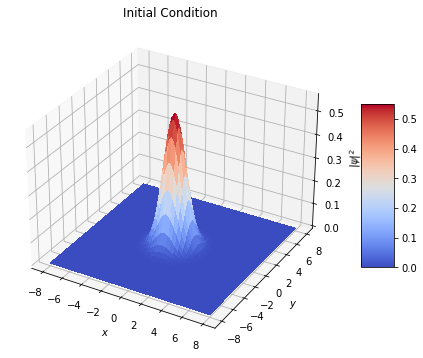

In [12]:
x_test = np.linspace(-8, 8, 100)
X_test, Y_test = np.meshgrid(x_test, x_test)
Z = f0(X_test, Y_test)
fig = pt.surface_plotter(X_test, Y_test, Z, title='Initial Condition', z_label=r'$|\psi|^2$')

By running the initial condition with the above paramethers one has that the algorithm ...

In [13]:
start_time = time.time()
t, X, Y, psi = gp.ti_tssp_2d_pbc(M, N, q, x_range, x_range, f0, ho_potential, dt, beta, eps)
end_time = time.time()
print("--- Evaluated in {:.2f} seconds ---".format(end_time - start_time))

[##############################] 100%
--- Evaluated in 57.33 seconds ---


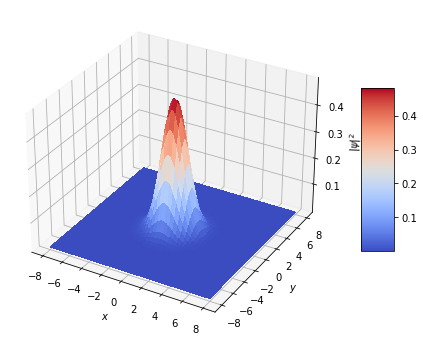

In [14]:
lst_fig = pt.surface_plotter(X, Y, np.abs(psi[-1]), title='', z_label=r'$|\psi|^2$')

In [15]:
#evolution_animation = pt.surface_animate(X, Y, np.abs(psi), title='Evolution of Gaussian', z_label=r'$|\psi|^2$')
#evolution_animation.save('myAnimation.gif', writer='imagemagick', fps=30)

In the following we determine the variance of the condensate width in the $x$ and $y$ direction as:
$$
\sigma_x=\sqrt{\langle(x-\langle x \rangle)^2\rangle} \quad \sigma_y=\sqrt{\langle(y-\langle y \rangle)^2\rangle}
$$
where
$$
\langle f\rangle=\int_\mathbb{R^2} f(\vec{x}) |\psi(\vec{x},t)|^2 \: d\vec{x}
$$

In [16]:
sigma = np.array([np.sqrt(gp.mean_value_2d(fx2, psi[i], x_range, x_range, M) - gp.mean_value_2d(fx, psi[i], x_range, x_range, M)**2) 
                  for i in range(len(t))])

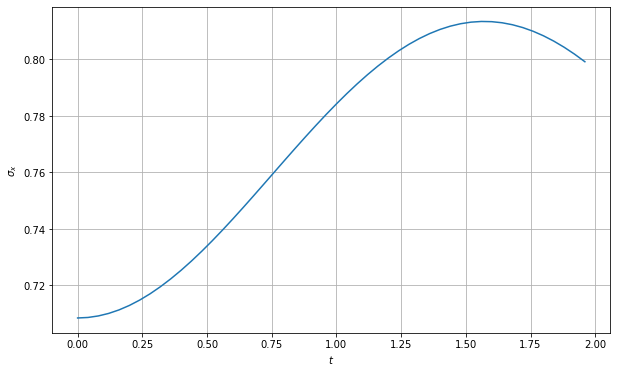

In [17]:
sigma_fig = pt.plane_plotter(t, sigma, x_label=r'$t$', y_label=r'$\sigma_x$')

From this paper we have also implemented, in the function `ti_tssp_1d_pbc`, the 1D implementation for the TSSP method applied to the Gross Pitaevskii equation.

## Test of Algorithms from [2.]

The following tests are run like the example **4.3.I** (pg. 1689) in the above mentioned paper.

In [ ]:
M = 16*8
N = 10000
x_range = [-8, 8]
y_range = [-4, 4]
gx = 1
gy = 4
saving_time = 50
potential = lambda x, y: 0.5*(gx**2*x**2 + gy**2*y**2)
psi0 = lambda x, y: (gx*gy)**(1/4) * np.exp(-(gx**2*x**2+gy**2*y**2)/2) / np.pi**(1/2)
beta = 200.
dt = 0.001
eps = 1

In [ ]:
start_time = time.time()
t, X, Y, psi = gp.td_tssp_2d_pbc(M, N, a, b, psi0, potential, dt, beta, eps, saving_time)
end_time = time.time()
print("--- Evaluated in {:.2f} seconds ---".format(end_time - start_time))

In [ ]:
V = potential(X, Y)
x_spacing = (x_range[1] - x_range[0])/M
y_spacing = (y_range[1] - y_range[0])/M

E = np.empty(len(t))
for i in range(len(t)):
    E[i] = energy_gpe(psi[i], V, beta, eps, x_spacing, y_spacing)

In [ ]:
mu_g = mu_gpe(psi[-1], V, beta, x_spacing, y_spacing)
x_rms = np.sqrt(mean_value_bis(fx2, psi[-1], x_range[0], x_range[1], y_range[0], y_range[1], M))
y_rms = np.sqrt(mean_value_bis(fy2, psi[-1], x_range[0], x_range[1], y_range[0], y_range[1], M))

## Test of Algorithms from [3.]

The following tests are run like the example in the first page in the above mentioned paper.

In [ ]:
M = 256
N = 5000
x_range = [-10, 10]
y_range = [-10, 10]
gx = 1.0
gy = 1.0
v = 2.0
w0, delt, r0 = 60.0, 3.0, 0.0

# Notice that the potential is 1/2 instead of 1/4, maybe can discusse it later in more detail 
potential = lambda x, y: 0.5*(gx**2*x**2 + gy**2*y**2) + w0*np.exp(-delt*((x-r0)**2+y**2))
potential_t = lambda x, y, t: 0.5*(gx**2*x**2 + gy**2*y**2) + w0*np.exp(-delt*((x-r0)**2 + (y-v*t)**2))
psi0 = lambda x, y: (gx*gy)**(1/4) * np.exp(-(gx**2*x**2 + gy**2*y**2)/2) / np.pi**(1/2)

dt = 0.001
saving_time = 100
eps = 2
beta = 1000 # Notice that I put twice the value in the paper as later it is diveided by epsilon

In [ ]:
start_time = time.time()
t, X, Y, psi = td_tssp_2d_pbc_bis(M, N, a, b, c, d, psi0, potential, dt, beta, eps, saving_time)
end_time = time.time()
print("--- Evaluated in {:.2f} seconds ---".format(end_time - start_time))

In [ ]:
V = potential(X, Y)
x_spacing = (x_range[1] - x_range[0])/M
y_spacing = (y_range[1] - y_range[0])/M

En = np.empty(len(t))
for i in range(len(t)):
    En[i] = energy_gpe(psi[i], V, beta, eps, x_spacing, y_spacing)

## References

[1.] [**Numerical Solution of the Gross-Pitaevskii Equation for Bose-Einstein Condensation**](https://arxiv.org/abs/cond-mat/0303239), Weizhu Bao, Dieter Jaksch, Peter A. Markowich

[2.] [**Computing the ground state solution of Bose-Einstein condensates by a normalized gradient flow**](https://arxiv.org/abs/cond-mat/0303241), Weizhu Bao, Qiang Du

[3.] [**Vortex Formation in Dilute Inhomogeneous Bose-Einstein Condensates**](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.80.3903), B. Jackson, J. F. McCann, and C. S. Adams